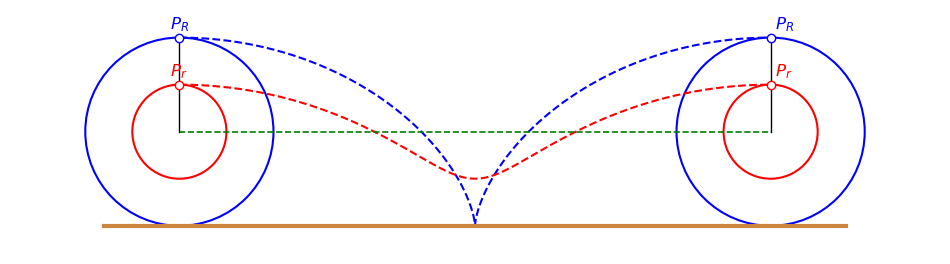

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_aristotle_wheel(R=2.0, r=1.0, savepath=None):
    """
    Plot Aristotle's Wheel Paradox diagram for two concentric rolling circles.

    Parameters
    ----------
    R : float
        Radius of the larger circle.
    r : float
        Radius of the smaller circle.
    savepath : str or None
        If provided, saves the figure to the given path.
    """
    theta = np.linspace(0, 2 * np.pi, 600)

    # General trochoid for a point at distance a from center
    def trochoid(a):
        x = R * theta + a * np.sin(theta)
        y = R + a * np.cos(theta)
        return x, y

    # Trajectories for P_R (a=R) and P_r (a=r)
    x_R, y_R = trochoid(R)
    x_r, y_r = trochoid(r)

    # Center line at y = R, spanning exactly 2πR
    x_line = [0.0, 2 * np.pi * R]
    y_line = [R, R]

    # Figure/axes
    fig, ax = plt.subplots(figsize=(12, 4))
    ax.set_aspect('equal')
    ax.axis('off')

    # Paths
    ax.plot(x_R, y_R, 'b--', lw=1.5, label="Path of $P_R$")
    ax.plot(x_r, y_r, 'r--', lw=1.5, label="Path of $P_r$")
    ax.plot(x_line, y_line, 'g--', lw=1.2, label="Center line")

    # Vertical black lines at start and end (center to top of large circle)
    ax.plot([0, 0], [R, R + R], 'k', lw=1)
    ax.plot([2 * np.pi * R, 2 * np.pi * R], [R, R + R], 'k', lw=1)

    # Circles at start (x=0) and end (x=2πR)
    left_large  = plt.Circle((0.0, R), R, edgecolor='blue', fill=False, lw=1.5)
    left_small  = plt.Circle((0.0, R), r, edgecolor='red',  fill=False, lw=1.5)
    right_large = plt.Circle((2 * np.pi * R, R), R, edgecolor='blue', fill=False, lw=1.5)
    right_small = plt.Circle((2 * np.pi * R, R), r, edgecolor='red',  fill=False, lw=1.5)
    for c in (left_large, left_small, right_large, right_small):
        ax.add_patch(c)

    # Markers and labels: top points on each circle at start/end
    PR_left  = (0.0, R + R)
    Pr_left  = (0.0, R + r)
    PR_right = (2 * np.pi * R, R + R)
    Pr_right = (2 * np.pi * R, R + r)

    ax.plot(*PR_left,  'bo', markersize=6, mfc='white')
    ax.plot(*Pr_left,  'ro', markersize=6, mfc='white')
    ax.plot(*PR_right, 'bo', markersize=6, mfc='white')
    ax.plot(*Pr_right, 'ro', markersize=6, mfc='white')

    ax.text(PR_left[0]  - 0.2, PR_left[1]  + 0.2, r"$P_R$", fontsize=12, color='blue')
    ax.text(Pr_left[0]  - 0.2, Pr_left[1]  + 0.2, r"$P_r$", fontsize=12, color='red')
    ax.text(PR_right[0] + 0.1, PR_right[1] + 0.2, r"$P_R$", fontsize=12, color='blue')
    ax.text(Pr_right[0] + 0.1, Pr_right[1] + 0.2, r"$P_r$", fontsize=12, color='red')

    # Ground line
    x_pad = max(R, r) * 0.8
    ax.plot([-x_pad, 2 * np.pi * R + x_pad], [0, 0], color='peru', lw=3)

    # Robust limits: include full circles and labels for any R, r
    pad_y = max(R, r) * 0.3
    y_min = min(0.0, R - max(R, r)) - pad_y
    y_max = R + max(R, r) + pad_y
    x_min = -R - x_pad
    x_max = 2 * np.pi * R + R + x_pad

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    if savepath:
        fig.savefig(savepath, dpi=300, bbox_inches='tight', pad_inches=0.1)

    plt.close(fig)  # close to avoid handle leaks
    return fig

# Save as PNG
fig = plot_aristotle_wheel(R=2, r=1, savepath="fig9.png")  
fig

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def animate_aristotle_wheel(R=2.0, r=1.0, frames=300, interval=30, show_trails=True):
    """
    Animate Aristotle's Wheel Paradox: two concentric circles of radii R and r
    roll without slipping over a distance 2πR. Points P_R (a=R) and P_r (a=r)
    trace trochoids. Returns HTML for inline display in Jupyter.
    """
    # Parameter over one full revolution
    theta = np.linspace(0.0, 2*np.pi, frames)

    # Helpers
    def trochoid(a, th):
        x = R*th + a*np.sin(th)
        y = R   + a*np.cos(th)
        return x, y

    # Precompute paths for trails
    xR_path, yR_path = trochoid(R, theta)   # P_R path
    xr_path, yr_path = trochoid(r, theta)   # P_r path

    # Figure and axes
    fig, ax = plt.subplots(figsize=(12, 4))
    ax.set_aspect('equal')
    ax.axis('off')

    # Static floor and center line
    x_total = 2*np.pi*R
    pad_x = max(R, r)*0.8
    ax.plot([-pad_x, x_total + pad_x], [0, 0], color='peru', lw=3)   # floor
    ax.plot([0, x_total], [R, R], 'g--', lw=1.2)                     # center line y=R

    # Static end markers: vertical lines at start and end
    ax.plot([0, 0], [R, R+R], 'k', lw=1)
    ax.plot([x_total, x_total], [R, R+R], 'k', lw=1)

    # Dynamic patches: rolling concentric circles (share same center)
    big = Circle((0, R), R, fill=False, lw=1.8, ec='blue')
    small = Circle((0, R), r, fill=False, lw=1.8, ec='red')
    ax.add_patch(big)
    ax.add_patch(small)

    # Moving points P_R and P_r
    PR_dot, = ax.plot([], [], 'o', ms=6, mfc='white', mec='blue')
    Pr_dot, = ax.plot([], [], 'o', ms=6, mfc='white', mec='red')

    # Labels near points
    PR_lbl = ax.text(0, 0, r"$P_R$", fontsize=12, color='blue',
                     ha='left', va='bottom')
    Pr_lbl = ax.text(0, 0, r"$P_r$", fontsize=12, color='red',
                     ha='left', va='bottom')

    # Optional trails
    PR_trail, = ax.plot([], [], 'b--', lw=1.2) if show_trails else (None,)
    Pr_trail, = ax.plot([], [], 'r--', lw=1.2) if show_trails else (None,)

    # Robust limits (avoid clipping for any R, r)
    pad_y = max(R, r)*0.35
    y_min = min(0.0, R - max(R, r)) - pad_y
    y_max = R + max(R, r) + pad_y
    x_min = -R - pad_x
    x_max = x_total + R + pad_x
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    # Animation update
    def update(i):
        th = theta[i]
        # Rolling center (translation only; rotation is encoded in trochoid points)
        center_x = R*th
        center_y = R
        big.center = (center_x, center_y)
        small.center = (center_x, center_y)

        # Current P_R and P_r
        xR, yR = trochoid(R, th)
        xr, yr = trochoid(r, th)

        PR_dot.set_data(xR, yR)
        Pr_dot.set_data(xr, yr)

        PR_lbl.set_position((xR + 0.08*R, yR + 0.08*R))
        Pr_lbl.set_position((xr + 0.08*R, yr + 0.08*R))

        # Update trails
        artists = [big, small, PR_dot, Pr_dot, PR_lbl, Pr_lbl]
        if show_trails:
            PR_trail.set_data(xR_path[:i+1], yR_path[:i+1])
            Pr_trail.set_data(xr_path[:i+1], yr_path[:i+1])
            artists += [PR_trail, Pr_trail]
        return artists

    anim = FuncAnimation(fig, update, frames=frames, interval=interval, blit=True)
    plt.close(fig)  # prevent duplicate static output
    return anim

# Example (in a Jupyter cell):
anim = animate_aristotle_wheel(R=2.0, r=1.0)
# Save to MP4 (requires ffmpeg installed)
anim.save("aristotle_wheel.mp4", writer="ffmpeg", dpi=150)
# Or save to GIF (requires ImageMagick or Pillow support)
anim.save("aristotle_wheel.gif", writer="pillow", dpi=100)
# Display animation
HTML(anim.to_jshtml())